# Example with Simulated Data in non-BIDS format

Here our data is saved in examples/data/simulated_Data/data.mat

From nm_IO we use the loadmat function to load this data, and then we can see that the channel names, as well as the bad channels and the sampling frequency are also specified.

The scrip that generates the data is examples/createSimulatedData.py

In [1]:
import os

import numpy as np

from py_neuromodulation import (
    nm_analysis,
    nm_define_nmchannels,
    nm_IO,
    nm_stream_offline
)

import matplotlib.pyplot as plt
# Reload imports to get changes in other scripts
%load_ext autoreload
%autoreload 2

Set up the necessary paths to the data.

In [2]:
SCRIPT_PATH = os.path.dirname(os.path.abspath(''))
DATA_PATH = os.path.join(SCRIPT_PATH,'examples','data','simulated_Data','data.mat')

PATH_OUT = os.path.join(SCRIPT_PATH,'examples','data','simulated_Data')

In [3]:
data_dict = nm_IO.loadmat(DATA_PATH)

In [4]:
data = data_dict['data'] # voltage values for our simulated data
channels = data_dict['channels'] # array with all channel names
bad = data_dict['bad'] # bad channels
sfreq = data_dict['sfreq']  # sampling frequency

In order to give the channel names to the Stream class, we need them to be set with
```nm_define_nmchannels.set_channels```.
We also set the type to be "seeg", but please remember this is actually simulated data.

In [5]:
ch_names = list(channels)
ch_types = ["ecog" for _ in range(len(ch_names))]

nm_channels = nm_define_nmchannels.set_channels(
    ch_names=ch_names,
    ch_types=ch_types,
    reference="default",
    bads=None,
    new_names="default",
    used_types=["ecog"],
)

stream = nm_stream_offline.Stream(
    settings=None,
    nm_channels=nm_channels,
    verbose=True,
)

# stream.reset_settings()
# stream.settings["features"]["fft"] = True

stream.set_settings_fast_compute()

stream.settings['features']['raw_hjorth'] = True
stream.settings['features']['bandpass_filter'] = True
stream.settings['features']['fft'] = True
stream.settings['features']['sharpwave_analysis'] = True

stream.init_stream(
    sfreq=sfreq,
    line_noise=50,
)

No Error occurred when testing the settings.
No data specified. Sanity checks related to the length of the signal relative to the filter order will be skipped.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 7.50 Hz
- Upper transition bandwidth: 7.50 Hz
- Filter length: 999 samples (0.999 sec)



In [6]:
stream.settings

{'sampling_rate_features_hz': 10,
 'segment_length_features_ms': 1000,
 'preprocessing': {'raw_resampling': True,
  'raw_normalization': False,
  're_referencing': True,
  'notch_filter': True,
  'preprocessing_order': ['raw_resampling', 'notch_filter', 're_referencing']},
 'features': {'raw_hjorth': True,
  'return_raw': False,
  'bandpass_filter': True,
  'stft': False,
  'fft': True,
  'sharpwave_analysis': True,
  'coherence': False,
  'fooof': False,
  'nolds': False,
  'bursts': False},
 'postprocessing': {'feature_normalization': True,
  'project_cortex': False,
  'project_subcortex': False},
 'raw_resampling_settings': {'resample_freq_hz': 1000},
 'raw_normalization_settings': {'normalization_time_s': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'feature_normalization_settings': {'normalization_time_s': 30,
  'normalization_method': 'zscore',
  'clip': 3},
 'frequency_ranges_hz': {'theta': [4, 8],
  'alpha': [8, 12],
  'low beta': [13, 20],
  'high beta': [20, 35],
  

## Feature Estimation
The feature estimation step is, then, as straightforward as in example_BIDS.ipynb.

In [7]:
stream.run(
    data=data,
    folder_name="simulated_Data_results",
    out_path_root=PATH_OUT,
)

Last batch took: 0.04 seconds
1.0 seconds of data processed
Last batch took: 0.04 seconds
1.1 seconds of data processed
Last batch took: 0.04 seconds
1.2 seconds of data processed
Last batch took: 0.05 seconds
1.3 seconds of data processed
Last batch took: 0.04 seconds
1.4 seconds of data processed
Last batch took: 0.04 seconds
1.5 seconds of data processed
Last batch took: 0.04 seconds
1.6 seconds of data processed
Last batch took: 0.04 seconds
1.7 seconds of data processed
Last batch took: 0.05 seconds
1.8 seconds of data processed
Last batch took: 0.04 seconds
1.9 seconds of data processed
Last batch took: 0.04 seconds
2.0 seconds of data processed
Last batch took: 0.05 seconds
2.1 seconds of data processed
Last batch took: 0.05 seconds
2.2 seconds of data processed
Last batch took: 0.05 seconds
2.3 seconds of data processed
Last batch took: 0.04 seconds
2.4 seconds of data processed
Last batch took: 0.05 seconds
2.5 seconds of data processed
Last batch took: 0.04 seconds
2.6 second

# Plot power spectra features, and other feature modalities, over time.


In [8]:
# init analyzer
feature_reader = nm_analysis.Feature_Reader(
    feature_dir=PATH_OUT, feature_file="simulated_Data_results"
)

In [9]:
feature_reader.feature_arr.T

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
ch0-avgref_RawHjorth_Activity,0.882630,-1.0,-1.367275,-0.151174,-1.235934,-1.855722,-1.819373,-1.555305,-1.102277,-1.405577,...,-1.090374,-1.118614,-1.449125,-1.588195,-0.477282,-0.287010,-0.299335,-0.243119,-0.020700,0.172209
ch0-avgref_RawHjorth_Mobility,0.694476,-1.0,1.335631,0.667822,-1.342956,-1.051616,-1.183640,-0.933230,0.617023,1.534461,...,-0.429672,-0.660339,-0.066291,0.553801,0.709205,0.509630,0.676754,0.880979,0.930923,1.475477
ch0-avgref_RawHjorth_Complexity,2.462992,1.0,-1.361315,-0.073335,1.566361,0.812386,0.743409,0.544050,-0.738372,-1.616732,...,0.545511,0.951656,0.348779,-0.146068,-0.215494,-0.132379,-0.135217,-0.277024,-0.455322,-0.934888
ch1-avgref_RawHjorth_Activity,0.556536,1.0,-0.783321,-1.301627,-0.504916,1.136843,0.481990,1.423669,-1.640579,-1.795642,...,-0.103534,-1.209974,-1.136197,-1.285932,-1.419555,-1.382005,-2.147933,-2.075019,-1.796562,-2.182206
ch1-avgref_RawHjorth_Mobility,0.921213,-1.0,1.243977,0.237748,-1.661177,-1.759659,-0.329894,-0.250645,0.157943,-1.063491,...,-1.229485,-0.629380,-0.819027,-0.333114,0.067570,0.460277,-0.078615,0.647651,0.991588,1.311360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch7-avgref_Sharpwave_Max_sharpness_range_5_80,0.011759,1.0,-1.398564,1.667412,1.897164,1.352970,1.114703,0.970558,0.878705,0.888602,...,-0.383718,0.473441,0.591848,0.535339,0.532799,0.528461,0.526578,0.558794,0.314636,0.528676
ch7-avgref_Sharpwave_Max_prominence_range_5_30,1.544704,1.0,-1.401163,-0.049647,-0.113099,-0.106976,-0.111350,-0.103816,-0.097442,-0.108782,...,1.370428,1.328523,-0.400247,-0.407412,-0.414535,0.387234,0.975571,0.858113,0.855487,0.851732
ch7-avgref_Sharpwave_Mean_interval_range_5_30,45.350000,-1.0,-0.022065,0.977864,0.915563,0.020035,0.772044,-2.116288,0.379933,-1.359135,...,-0.550091,-0.769346,0.602211,-0.000581,-0.628993,-0.786049,0.211128,1.135152,0.298651,0.325734
ch7-avgref_Sharpwave_Max_sharpness_range_5_30,-0.046978,-1.0,-0.286036,-0.243408,-0.214431,-0.189972,-0.153090,-1.293930,-0.797261,-2.252740,...,2.648421,1.000393,1.007180,0.932563,0.551943,0.560935,0.587251,0.584132,0.579593,0.551736


### First we want to plot FFT for channel ch0

In [10]:
# We take channel ch0 and plot all fft
ch_used = feature_reader.nm_channels.query(
    '(type=="ecog") and (used == 1)'
).iloc[0]["name"]

ch_cols = [f_ for f_ in feature_reader.feature_arr.columns if ch_used in f_]
filtered_df = feature_reader.feature_arr[ch_cols].filter(like='fft')

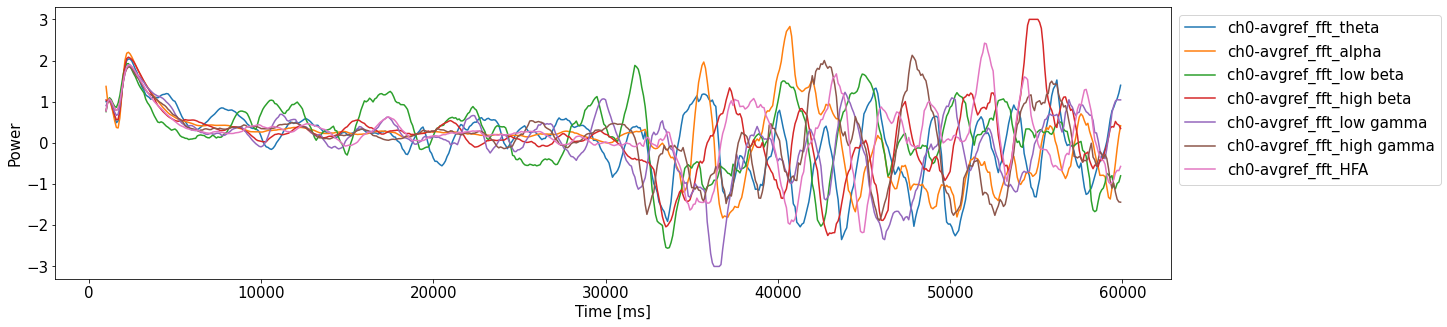

In [11]:
# The simulated time was 60 seconds
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        filtered_df)
plt.legend(
        list(filtered_df.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Power", fontsize = 15)
ax.tick_params(labelsize=15)
plt.show()

### Plot the Hjorth Parameters for All Channels over Time

Hjorth parameters are indicators of statistical properties used in signal processing in the time domain introduced by Bo Hjorth in 1970. The parameters are Activity, Mobility, and Complexity. [1-2] These three parameters will together characterize the signal in terms of amplitude, time scale and complexity.

#### Start with Hjorth Activity

Activity, giving a measure of the squared standard deviation of the amplitude, sometimes referred to as the variance or mean power.

In [12]:
df_hjorth_act = feature_reader.feature_arr.filter(like='Hjorth_Activity')

In [13]:
df_hjorth_act.T

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
ch0-avgref_RawHjorth_Activity,0.882630,-1.0,-1.367275,-0.151174,-1.235934,-1.855722,-1.819373,-1.555305,-1.102277,-1.405577,...,-1.090374,-1.118614,-1.449125,-1.588195,-0.477282,-0.287010,-0.299335,-0.243119,-0.020700,0.172209
ch1-avgref_RawHjorth_Activity,0.556536,1.0,-0.783321,-1.301627,-0.504916,1.136843,0.481990,1.423669,-1.640579,-1.795642,...,-0.103534,-1.209974,-1.136197,-1.285932,-1.419555,-1.382005,-2.147933,-2.075019,-1.796562,-2.182206
ch2-avgref_RawHjorth_Activity,0.417858,-1.0,-1.037301,-1.277991,-1.201871,-1.104527,0.587122,0.974224,-1.262316,1.322750,...,-0.449342,-0.389730,-0.331210,0.156391,0.536044,0.464839,-0.160490,1.021046,1.061278,0.418250
ch3-avgref_RawHjorth_Activity,0.425983,1.0,1.242221,1.494994,-0.032305,0.390331,0.974066,0.678885,1.168827,0.682988,...,-0.767884,-0.805903,-0.895908,-1.370147,-0.855360,-0.726331,-0.068965,-0.420400,-0.935424,-0.605486
ch4-avgref_RawHjorth_Activity,0.699151,1.0,-0.266716,0.462306,-0.001813,-1.729825,-0.157671,-0.403790,-0.267966,-0.716961,...,0.316797,-0.063618,0.061168,-0.649810,-0.178131,-0.853823,0.383374,0.231009,0.023304,0.244349
ch5-avgref_RawHjorth_Activity,0.690977,1.0,0.360911,-0.688272,-0.678157,-0.505722,1.188627,1.674573,1.807205,1.454575,...,-0.088603,0.152623,0.042933,0.478952,1.002479,1.632258,1.242377,1.304434,1.848896,3.000000
ch6-avgref_RawHjorth_Activity,0.898732,-1.0,-1.402894,-1.129834,-0.594856,-0.858787,-0.071345,-0.048153,0.745725,0.197713,...,1.686957,1.421994,1.326082,1.449887,1.709370,1.254096,1.704313,1.245815,0.583121,0.297681
ch7-avgref_RawHjorth_Activity,0.607592,1.0,-0.384269,-1.335220,0.999353,-0.981603,-1.745607,-0.270627,-0.195572,-1.701818,...,0.112923,0.405198,0.086521,0.181699,0.156387,1.082716,1.258723,1.792291,1.992558,2.480570


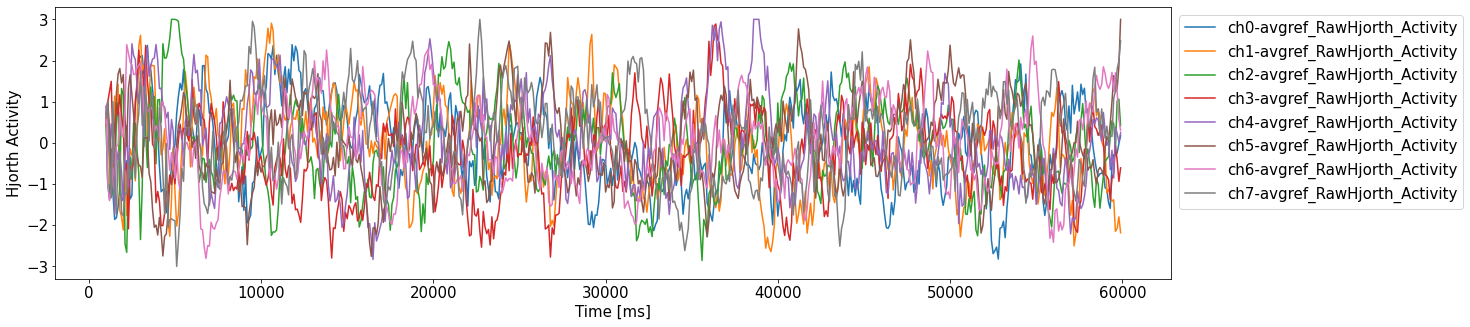

In [14]:
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        df_hjorth_act)
plt.legend(
        list(df_hjorth_act.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Hjorth Activity", fontsize = 15)
ax.tick_params(labelsize=15)
plt.show()

#### Hjorth Mobility
Mobility, giving a measure of the standard deviation of the slope with reference to the standard deviation of the amplitude. It is expressed as a ratio per time unit and may be conceived also as a mean frequency.

In [15]:
df_hjorth_mob = feature_reader.feature_arr.filter(like='Hjorth_Mobility')

In [16]:
df_hjorth_mob.T

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
ch0-avgref_RawHjorth_Mobility,0.694476,-1.0,1.335631,0.667822,-1.342956,-1.051616,-1.183640,-0.933230,0.617023,1.534461,...,-0.429672,-0.660339,-0.066291,0.553801,0.709205,0.509630,0.676754,0.880979,0.930923,1.475477
ch1-avgref_RawHjorth_Mobility,0.921213,-1.0,1.243977,0.237748,-1.661177,-1.759659,-0.329894,-0.250645,0.157943,-1.063491,...,-1.229485,-0.629380,-0.819027,-0.333114,0.067570,0.460277,-0.078615,0.647651,0.991588,1.311360
ch2-avgref_RawHjorth_Mobility,1.044838,-1.0,-0.908867,-1.637250,-1.157058,-1.342440,-1.459999,-0.251033,0.232228,-0.029992,...,-0.543250,0.125677,0.274285,0.568394,0.719557,0.353427,0.010755,-0.113908,0.015199,-0.438721
ch3-avgref_RawHjorth_Mobility,1.027723,-1.0,-1.363171,-1.022453,-0.722117,-0.223756,-0.357940,-0.800110,-0.612001,0.706259,...,1.084341,1.170129,0.867374,1.763350,1.495621,1.077276,0.972068,1.267395,1.972095,2.295863
ch4-avgref_RawHjorth_Mobility,0.789049,-1.0,1.219577,1.580708,1.464493,1.626153,0.505148,0.341232,0.215538,-1.148779,...,-0.950115,-1.244703,-2.045756,-1.649516,-1.752763,-1.475746,-1.152294,-0.862726,-1.168004,-1.168191
ch5-avgref_RawHjorth_Mobility,0.846106,-1.0,-0.976653,-0.887531,-0.071633,0.166653,0.132288,0.277213,1.226409,0.585892,...,0.251555,-0.055173,0.349306,0.516651,-0.101868,0.155555,-0.588873,-0.043610,0.030795,-0.692088
ch6-avgref_RawHjorth_Mobility,0.750405,-1.0,1.132636,-0.851009,-1.793354,-1.268245,-1.021533,-0.884558,-0.093708,-0.203764,...,-1.185507,-1.354286,-1.125578,-1.456777,-1.718857,-1.135684,-0.528650,-0.620709,-0.565001,0.516318
ch7-avgref_RawHjorth_Mobility,0.868603,-1.0,-1.404701,1.089183,-0.752829,-1.880438,-1.419556,-1.509089,-0.949514,-1.463321,...,-0.399312,-0.282633,-0.382395,0.305084,-0.133539,0.201089,-0.298657,0.385128,0.349682,1.372295


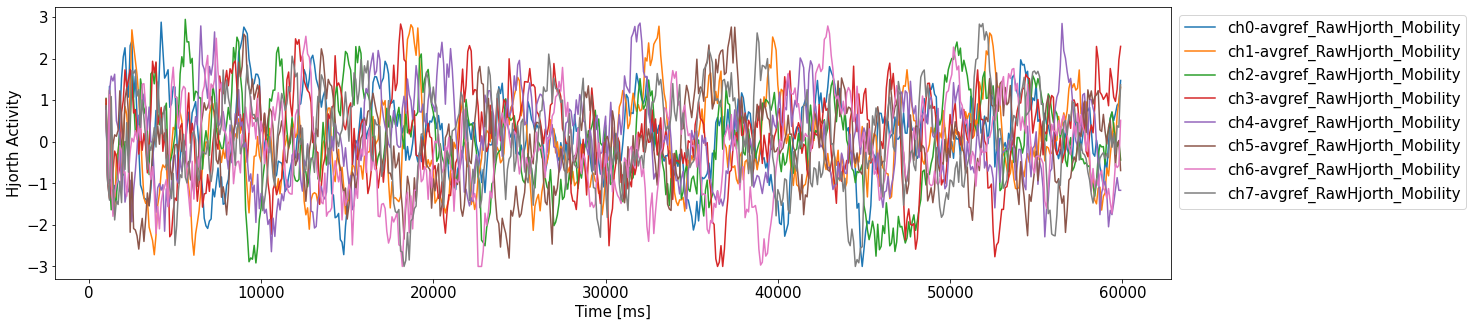

In [17]:
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        df_hjorth_mob)
plt.legend(
        list(df_hjorth_mob.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Hjorth Activity", fontsize = 15)
ax.tick_params(labelsize=15)
plt.show()

#### Hjorth Complexity
Complexity, giving a measure of excessive details with reference to the “softest” possible curve shape, th sine wave, this corresponding to unity. It is expressed as the number of standard slopes actually generated during the average time required for generation of one standard amplitude as given by the mobility. Due to the non-linear calculation of standard deviation this parameter will quantify any deviation from the sine shape as an increase from unity

In [18]:
df_hjorth_com = feature_reader.feature_arr.filter(like='Hjorth_Complexity')

In [19]:
df_hjorth_com.T

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
ch0-avgref_RawHjorth_Complexity,2.462992,1.0,-1.361315,-0.073335,1.566361,0.812386,0.743409,0.544050,-0.738372,-1.616732,...,0.545511,0.951656,0.348779,-0.146068,-0.215494,-0.132379,-0.135217,-0.277024,-0.455322,-0.934888
ch1-avgref_RawHjorth_Complexity,1.869398,1.0,-1.404525,-1.151363,1.445195,1.704925,-0.158125,0.050857,-0.326076,1.153328,...,1.337815,0.560216,0.821279,0.357702,0.182541,-0.293465,0.204063,-0.371440,-0.548642,-0.858618
ch2-avgref_RawHjorth_Complexity,1.645836,1.0,1.140563,1.657988,1.277033,1.421019,1.253342,0.461129,-0.084537,0.048054,...,0.226954,-0.391707,-0.493589,-0.808729,-0.840667,-0.473167,-0.181873,-0.138971,-0.395207,0.318894
ch3-avgref_RawHjorth_Complexity,1.698015,1.0,1.322708,1.095190,0.939497,0.287417,0.216715,0.588970,0.426126,-0.824353,...,-0.758089,-0.850770,-0.748049,-1.573292,-1.399074,-1.148786,-1.047675,-1.369312,-1.903363,-2.124193
ch4-avgref_RawHjorth_Complexity,2.137720,-1.0,-1.414083,-1.482675,-1.330125,-1.559944,-0.566581,-0.185611,-0.045770,1.186297,...,1.138595,1.048836,2.133851,1.601604,1.553244,1.199859,1.088770,0.973408,1.239573,1.557787
ch5-avgref_RawHjorth_Complexity,2.048055,1.0,0.917976,0.886994,0.188742,-0.112524,0.070352,0.250343,-0.894566,0.024377,...,-0.212054,0.094765,-0.574815,-0.999617,-0.469189,-0.812153,-0.051250,-0.688189,-0.776406,0.196913
ch6-avgref_RawHjorth_Complexity,2.280783,1.0,-0.924311,0.774054,1.779327,1.282908,0.892814,0.570043,-0.072930,0.008009,...,1.547125,1.621230,1.196173,1.743319,1.681343,1.141194,0.659460,0.792998,0.798000,-0.256336
ch7-avgref_RawHjorth_Complexity,2.009646,1.0,1.367040,-0.359214,0.701189,1.651756,1.158737,1.419398,0.714508,1.221795,...,0.368556,0.530451,0.563946,-0.194313,0.204000,0.021705,0.655909,0.139494,0.164086,-0.843151


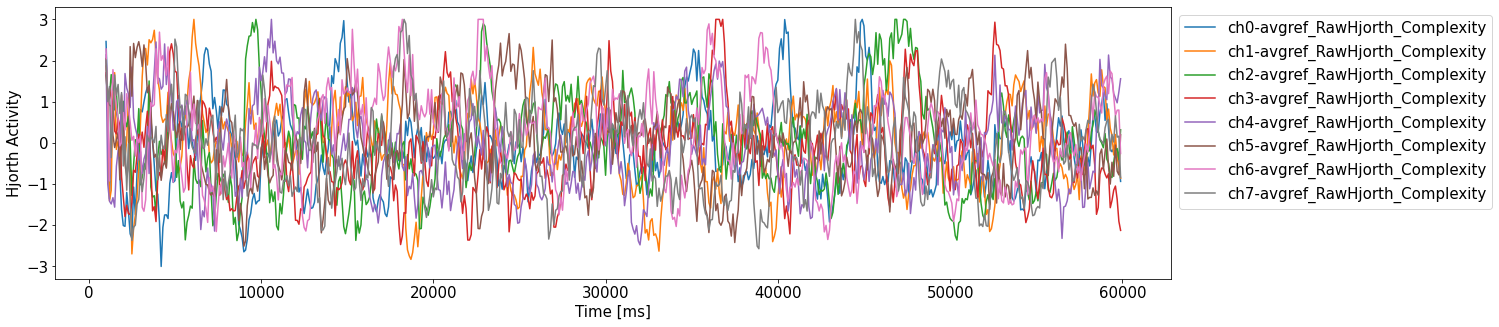

In [20]:
plt.figure(figsize=(20,5))
plt.plot(
        feature_reader.feature_arr["time"],
        df_hjorth_com)
plt.legend(
        list(df_hjorth_com.columns),
        bbox_to_anchor=(1, 1), fontsize=15)
ax = plt.gca()
plt.xlabel("Time [ms]", fontsize = 15)
plt.ylabel("Hjorth Activity", fontsize = 15)
ax.tick_params(labelsize=15)
plt.show()

## Feature correlation plot.

__References__
[1] Hjorth, Bo. “EEG Analysis Based on Time Domain Properties.” Electroencephalography and Clinical Neurophysiology 29, no. 3 (September 1, 1970): 306–10. https://doi.org/10.1016/0013-4694(70)90143-4.
[2] https://en.wikipedia.org/wiki/Hjorth_parameters

